In [ ]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("/export/home/oblum/projects/ld_gan")

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
import ld_gan 
import numpy as np
import ld_gan.utils.utils as ld
from time import time
from tqdm import tqdm
from ld_gan import visualize
import scipy.misc

In [3]:
path = "data/faceScrub/imgs_top_aligned/"
X, Y = ld_gan.data_proc.data_loader.load_data(path, resize = 128, test_train="train")
Y = np.argmax(Y, axis = 1)

100%|██████████| 523/523 [04:58<00:00,  2.74it/s]

load data from 'data/faceScrub/imgs_top_aligned/'


In [4]:
path = "data/faceScrub/imgs_top_aligned/"
Xt, Yt = ld_gan.data_proc.data_loader.load_data(path, resize=128, test_train="test")
Yt = np.argmax(Yt, axis = 1)

100%|██████████| 523/523 [00:29<00:00, 55.83it/s]

load data from 'data/faceScrub/imgs_top_aligned/'


In [5]:
X_64 = np.array([scipy.misc.imresize(img, (64,64)) for img in tqdm(X)])
Xt_64 = np.array([scipy.misc.imresize(img, (64,64)) for img in tqdm(Xt)])

100%|██████████| 6906/6906 [00:02<00:00, 3004.51it/s]


In [6]:
path_dst = "eval_imgs/nn_missing_mode/XS_111v1_gclf_scs_new"

In [ ]:
samples, nnmm, nnmm_ext = ld_gan.eval_gan.gen_samples("XS_111v1_gclf_scs_new.py", 
                                                      10,
                                                      #X, Y, Xt, Yt,
                                                      X, Y, Xt, Yt,
                                                      path_dst = path_dst,
                                                      n_imgs_per_class = 10000,
                                                      batch_size  = 256,
                                                      nn_search_radius = 50,
                                                      n_neighbors = 5,
                                                      n_classes = 1,
                                                      create_nnmm = True)

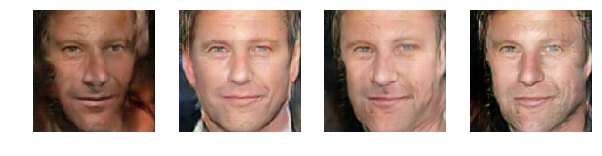

In [8]:
ld.disp(samples[:4])

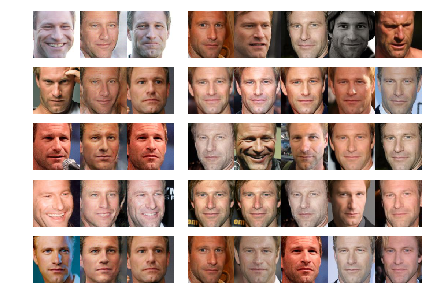

In [9]:
visualize.disp_array(nnmm_ext[:5], (5,1))

In [14]:
path = "eval_imgs/nn_missing_mode/XS_111v1_gclf_scs_new/nnmm/000/dists_fake.txt"
dists_fake = np.min(np.loadtxt(path), axis=1)

In [16]:
path = "eval_imgs/nn_missing_mode/XS_111v1_gclf_scs_new/nnmm/000/dists_real.txt"
dists_real = np.min(np.loadtxt(path), axis=1)

In [21]:
path = "eval_imgs/nn_missing_mode/XS_111v1_gclf_scs_new/nnmm/000/idxs_real.txt"
idxs_real = np.loadtxt(path)

In [18]:
dists_fake.mean()

8749.7204740034103

In [19]:
dists_real.mean()

8156.7303493417121

In [20]:
nnmm_imgs[0].shape

(128, 384, 3)

In [61]:
path = "eval_imgs/nn_missing_mode/xS_111v1_gclf_scs_new.py/samples_E30_sr25/samples/000"
fnames = ld.listdir(path, ".jpg")

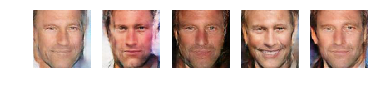

In [62]:
ld.disp(fnames[:5])

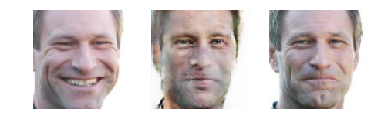

In [54]:
ld.disp([nnmm_imgs[0][:,:128], nnmm_imgs[0][:,128:256], nnmm_imgs[0][:,256:]])

In [55]:
img1 = nnmm_imgs[0][:,:128]
img2 = nnmm_imgs[0][:,128:256]
img3 = nnmm_imgs[0][:,256:]

In [57]:
np.mean(np.abs(img1-img3))

85.454508463541671